# 使用鸢尾花数据认识 SVM 以及绘制决策边界

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

# 处理成二分类问题
X = iris.data[:100, [2, 3]]
y = iris.target[:100]

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=666)

In [3]:
from sklearn.svm import SVC

# 构建模型
clf1 = SVC(kernel='linear')
clf1.fit(X_train, y_train)
clf1_score = clf1.score(X_test, y_test)
print(clf1_score)

1.0


In [4]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
clf2_score = clf2.score(X_test, y_test)
print(clf2_score)

1.0


In [8]:
import seaborn as sns

from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=18)

In [9]:
def plot_estimator(title, estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title(title,fontproperties=font)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

In [10]:
# SVM 分类鸢尾花数据集
sns.set()
plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

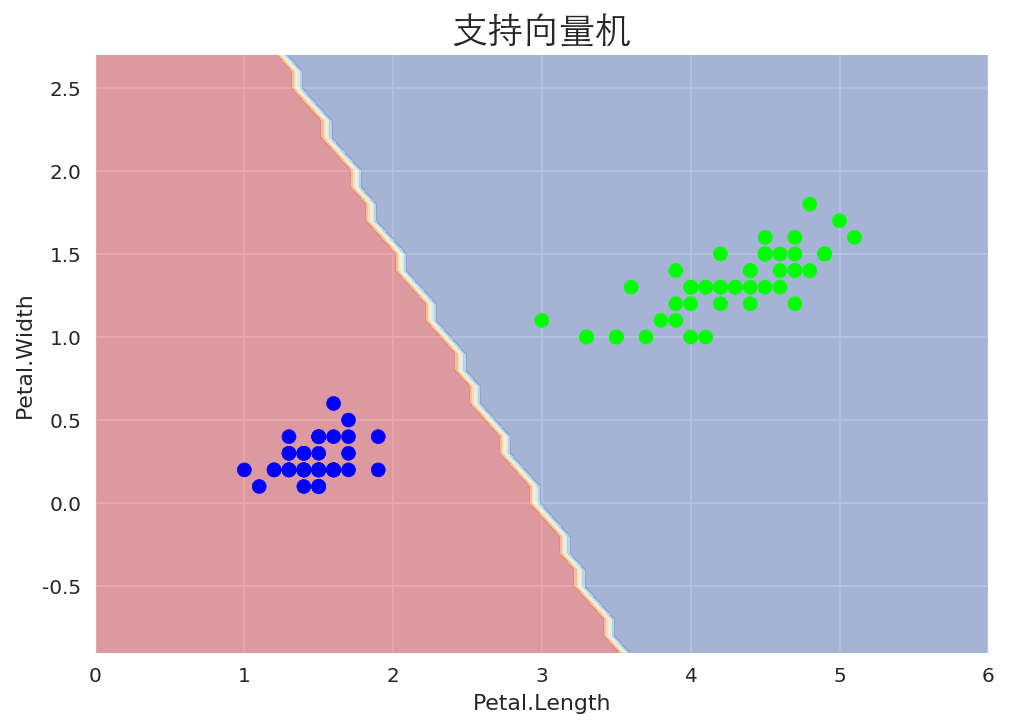

In [11]:
plot_estimator('支持向量机', clf1, X, y)

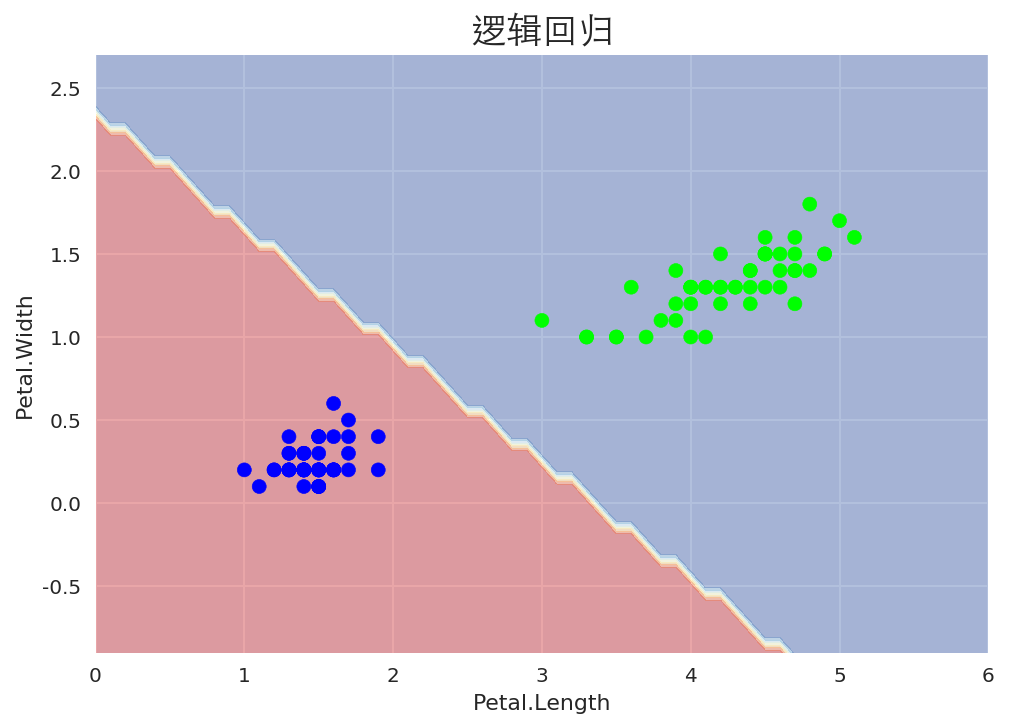

In [12]:
plot_estimator('逻辑回归', clf2, X, y)

![1.jpg](https://upload-images.jianshu.io/upload_images/414598-4cafcab1abef1fb3.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![2.jpg](https://upload-images.jianshu.io/upload_images/414598-dad515f5097b5e8b.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


## 认识参数 $C$ 的作用

+ $C$ 越大，表示分类越严格（训练数据集越不允许分错），这里 $C$ 可以理解为惩罚，容易过拟合。

In [14]:
data = np.array([[-1, 2, 0], [-2, 3, 0], [-2, 5, 0], [-3, -4, 0], [-0.1, 2, 0],
                 [0.2, 1, 1], [0, 1, 1], [1, 2, 1], [1, 1, 1], [-0.4, 0.5, 1], [2, 5, 1]])
X = data[:, :2]
y = data[:, 2]


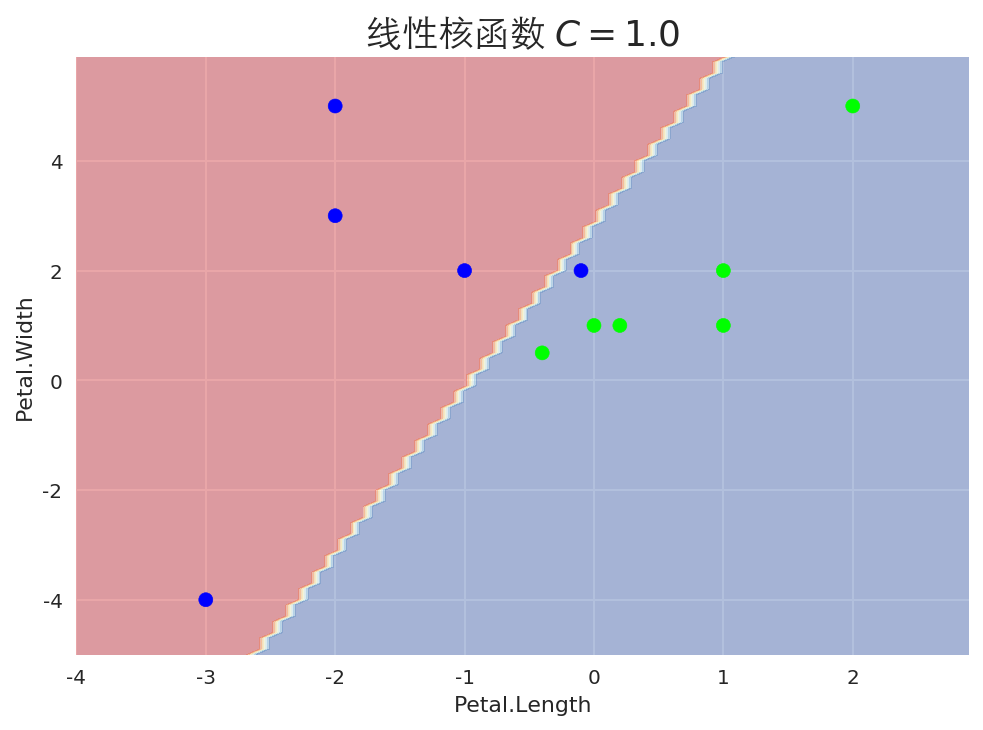

In [15]:
# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, y)
plot_estimator('线性核函数 $C=1.0$', clf, X, y)

从上面的图中，可以看到，$C$ 的值比较小的时候，SVM 允许分错一些样本，换回更好的预测未知样本的能力。

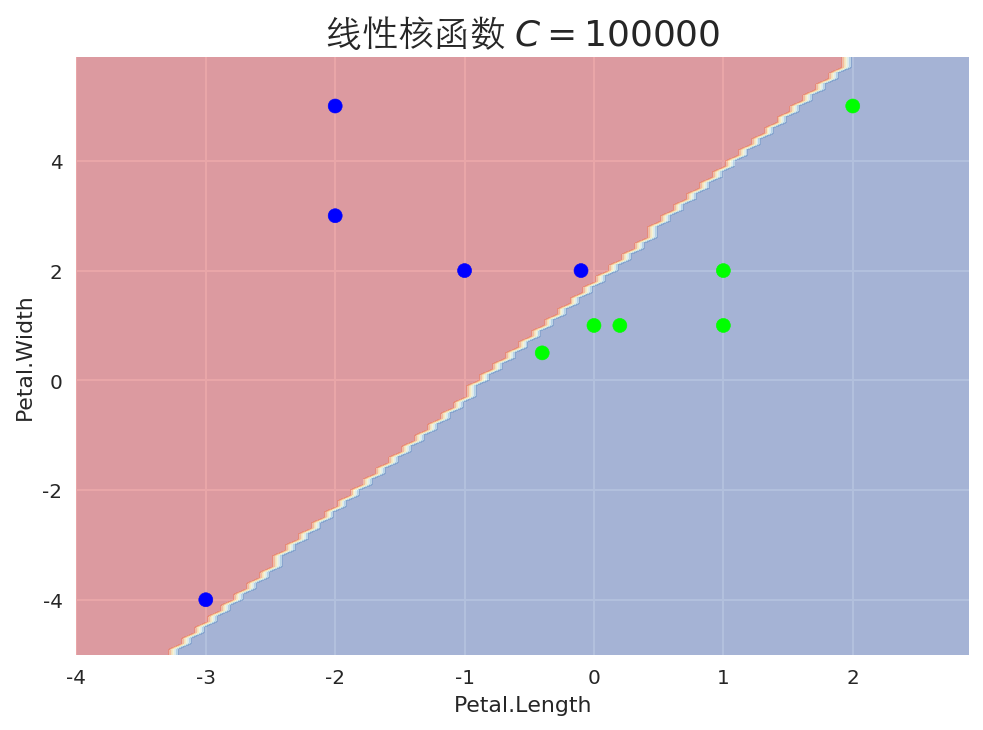

In [17]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, y)
plot_estimator('线性核函数 $C=100000$', clf, X, y)

![3.jpg](https://upload-images.jianshu.io/upload_images/414598-4da2226df3d6f5ff.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


![4.jpg](https://upload-images.jianshu.io/upload_images/414598-eeb83e0207b68605.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


##  SVM 常见的三种核函数：线性核函数、多项式核函数、高斯核函数

In [18]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

训练 3 个分类器。

In [19]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

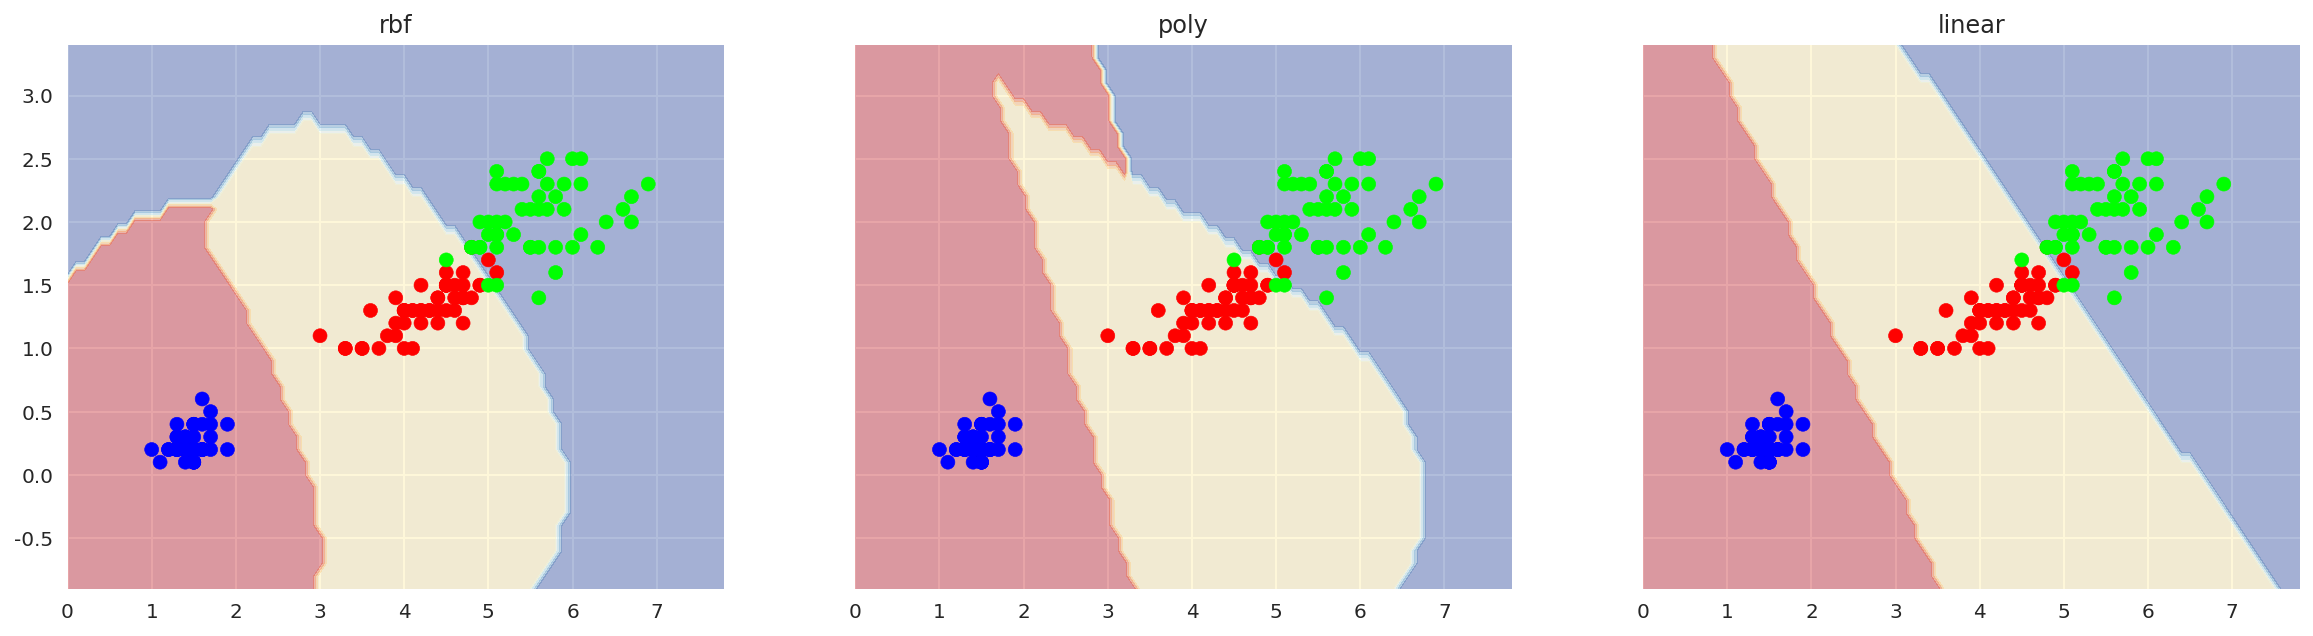

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0, 1, 2], [clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
    axarr[idx].set_title(title)

plt.show()

![5.jpg](https://upload-images.jianshu.io/upload_images/414598-582a9bf8fa53cdc8.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
